In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

from src import paths, plotting

plt.style.use('ggplot')
%matplotlib inline

!date -I

2024-05-14


In [3]:
ONLY_LEFT_HEMISPHERE = False
FTRACT_SELECTED_ROI = "3b" # "1"

In [4]:
fig_dir = f"pytepfit_ftract_comparison_results_200ms/{'only_left/' if ONLY_LEFT_HEMISPHERE else ''}"
%mkdir -p  {paths.path_figures(fig_dir)}

In [6]:
ftract_probabilities = pd.read_csv(paths.path(f'interim/L_{FTRACT_SELECTED_ROI}_response_probability_and_communication_metrics_M1_FTRACT_ED0_long.csv')).set_index('label')
ftract_probabilities

,response,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF
label,,,,,,,,,,,
L_V1,NaN,86.130607,0.0,inf,0.009180,0.004199,0.000142,inf,18.968501,0.005998,0.002778
L_V6,NaN,66.905377,0.0,inf,0.009451,0.005002,0.000193,inf,14.131162,0.008234,0.001962
L_V2,NaN,81.759962,0.0,inf,0.009236,0.004157,0.000104,inf,18.859902,0.006358,0.002463
L_V3,NaN,81.100872,0.0,inf,0.008173,0.004355,0.000131,inf,14.547486,0.007004,0.002766
L_V4,NaN,82.487126,0.0,inf,0.008430,0.004579,0.000099,inf,21.530236,0.007316,0.002854
...,...,...,...,...,...,...,...,...,...,...,...
R_FOP2,NaN,90.352537,0.0,inf,0.007381,0.005861,0.000228,inf,22.657491,0.006939,0.001658
R_PoI1,NaN,95.853057,0.0,inf,0.007615,0.004942,0.000635,inf,15.317664,0.006197,0.002664
R_Ig,NaN,83.897695,0.0,inf,0.007489,0.005057,0.000240,inf,21.995380,0.006711,0.001151


In [7]:
pytepfit_01 = pd.read_csv(paths.path('interim/pyTepFit_empirical/response_01_and_communication_metrics_M1_pyTepFit_200ms_thr8.csv')).set_index('label')
pytepfit_01.index = pytepfit_01.index.map(lambda x: x[:-3])
pytepfit_01

,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response
label,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,45.307805,0.001481,56.91748,0.017569,0.009146,0.005899,8.492163,8.492163,0.017569,0.004902,0
7Networks_LH_Cont_Cing_2,56.289608,0.000000,inf,0.012035,0.007808,0.001445,inf,13.765920,0.008938,0.003926,1
7Networks_LH_Cont_PFCl_1,92.766248,0.000000,inf,0.008308,0.006559,0.000284,inf,13.524316,0.006877,0.002492,1
7Networks_LH_Cont_PFCl_2,94.172221,0.000000,inf,0.008227,0.007810,0.001046,inf,15.620317,0.008135,0.004036,1
7Networks_LH_Cont_PFCl_3,92.564602,0.000000,inf,0.008065,0.007312,0.000696,inf,12.555779,0.008065,0.003484,0
...,...,...,...,...,...,...,...,...,...,...,...
7Networks_RH_Vis_5,115.547602,0.000000,inf,0.006240,0.004349,0.000006,inf,24.493235,0.004887,0.003644,0
7Networks_RH_Vis_6,105.548873,0.000000,inf,0.006381,0.004389,0.000011,inf,22.163802,0.003238,0.003574,0
7Networks_RH_Vis_7,90.633878,0.000000,inf,0.009385,0.005021,0.000052,inf,15.122497,0.009385,0.002838,0


In [8]:
pytepfit_AUC = pd.read_csv(paths.path('interim/pyTepFit_empirical/response_AUC_and_communication_metrics_M1_pyTepFit_200ms_thr8.csv')).set_index('label')
pytepfit_AUC.index = pytepfit_AUC.index.map(lambda x: x[:-3])
pytepfit_AUC

,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response
label,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,45.307805,0.001481,56.91748,0.017569,0.009146,0.005899,8.492163,8.492163,0.017569,0.004902,0.000000
7Networks_LH_Cont_Cing_2,56.289608,0.000000,inf,0.012035,0.007808,0.001445,inf,13.765920,0.008938,0.003926,3429.233902
7Networks_LH_Cont_PFCl_1,92.766248,0.000000,inf,0.008308,0.006559,0.000284,inf,13.524316,0.006877,0.002492,899.571678
7Networks_LH_Cont_PFCl_2,94.172221,0.000000,inf,0.008227,0.007810,0.001046,inf,15.620317,0.008135,0.004036,795.702728
7Networks_LH_Cont_PFCl_3,92.564602,0.000000,inf,0.008065,0.007312,0.000696,inf,12.555779,0.008065,0.003484,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
7Networks_RH_Vis_5,115.547602,0.000000,inf,0.006240,0.004349,0.000006,inf,24.493235,0.004887,0.003644,0.000000
7Networks_RH_Vis_6,105.548873,0.000000,inf,0.006381,0.004389,0.000011,inf,22.163802,0.003238,0.003574,0.000000
7Networks_RH_Vis_7,90.633878,0.000000,inf,0.009385,0.005021,0.000052,inf,15.122497,0.009385,0.002838,0.000000


In [11]:
dict_response_metrics = {"F-Tract":ftract_probabilities,"pyTepFit_AUC":pytepfit_AUC,"pyTepFit_01":pytepfit_01}

In [12]:
def partial_corr_ED(d,x,method):
    result = []
    result.append(pd.DataFrame({"n":[0],"r":[0],"CI95%":[None],"p-val":[1],"Y":["ED"]})) # just to have fitting images

    for k in d.keys():
        if k == "ED" or k == x or np.count_nonzero(d[x])<3 or np.count_nonzero(d[k])<3:
            continue
        df_one_result = pg.partial_corr(data=d,x=x,y=k,covar="ED", method=method)
        df_one_result['Y'] = k
        result.append(df_one_result)
    
    return pd.concat(result)

In [13]:
if ONLY_LEFT_HEMISPHERE:
    for df_name in dict_response_metrics:
        dict_response_metrics[df_name] = dict_response_metrics[df_name].head(len(dict_response_metrics[df_name])//2).copy()

In [14]:
dict_response_metrics["pyTepFit_AUC"]

,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response
label,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,45.307805,0.001481,56.91748,0.017569,0.009146,0.005899,8.492163,8.492163,0.017569,0.004902,0.000000
7Networks_LH_Cont_Cing_2,56.289608,0.000000,inf,0.012035,0.007808,0.001445,inf,13.765920,0.008938,0.003926,3429.233902
7Networks_LH_Cont_PFCl_1,92.766248,0.000000,inf,0.008308,0.006559,0.000284,inf,13.524316,0.006877,0.002492,899.571678
7Networks_LH_Cont_PFCl_2,94.172221,0.000000,inf,0.008227,0.007810,0.001046,inf,15.620317,0.008135,0.004036,795.702728
7Networks_LH_Cont_PFCl_3,92.564602,0.000000,inf,0.008065,0.007312,0.000696,inf,12.555779,0.008065,0.003484,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
7Networks_RH_Vis_5,115.547602,0.000000,inf,0.006240,0.004349,0.000006,inf,24.493235,0.004887,0.003644,0.000000
7Networks_RH_Vis_6,105.548873,0.000000,inf,0.006381,0.004389,0.000011,inf,22.163802,0.003238,0.003574,0.000000
7Networks_RH_Vis_7,90.633878,0.000000,inf,0.009385,0.005021,0.000052,inf,15.122497,0.009385,0.002838,0.000000


In [20]:
stat_all = {}
stat_all_partial = {}

for name in dict_response_metrics:
    df = dict_response_metrics[name]
    stat_all[name] = pg.pairwise_corr(df,'response', method='spearman').round(3)
    stat_all_partial[name] = partial_corr_ED(df,'response', method='spearman').round(3)

df_stat_all = pd.concat(stat_all).reset_index(names=["dataset",'--'])
df_stat_all_partial = pd.concat(stat_all_partial).reset_index(names=["dataset",'--'])

df_stat_all["r_abs"] = df_stat_all["r"].apply(abs)
df_stat_all_partial["r_abs"] = df_stat_all_partial["r"].apply(abs)

df_stat_all['p_sigf'] = df_stat_all['p-unc'].apply(lambda x: "*" if x< 0.05 else "")
df_stat_all_partial['p_sigf'] = df_stat_all_partial['p-val'].apply(lambda x: "*" if x< 0.05 else "")

df_stat_all

,dataset,--,X,Y,method,alternative,n,r,CI95%,p-unc,power,r_abs,p_sigf
0,F-Tract,0,response,ED,spearman,two-sided,78,-0.725,"[-0.82, -0.6]",0.000,1.000,0.725,*
1,F-Tract,1,response,SC_W,spearman,two-sided,78,0.698,"[0.56, 0.8]",0.000,1.000,0.698,*
2,F-Tract,2,response,SC_L,spearman,two-sided,78,-0.760,"[-0.84, -0.65]",0.000,1.000,0.760,*
3,F-Tract,3,response,SPE,spearman,two-sided,78,0.803,"[0.71, 0.87]",0.000,1.000,0.803,*
4,F-Tract,4,response,SPE_W,spearman,two-sided,78,0.705,"[0.57, 0.8]",0.000,1.000,0.705,*
5,F-Tract,5,response,COM,spearman,two-sided,78,0.764,"[0.65, 0.84]",0.000,1.000,0.764,*
6,F-Tract,6,response,SI,spearman,two-sided,78,-0.698,"[-0.8, -0.56]",0.000,1.000,0.698,*
7,F-Tract,7,response,SI_L,spearman,two-sided,78,-0.632,"[-0.75, -0.48]",0.000,1.000,0.632,*
8,F-Tract,8,response,NAV,spearman,two-sided,78,0.774,"[0.67, 0.85]",0.000,1.000,0.774,*
9,F-Tract,9,response,DIF,spearman,two-sided,78,0.047,"[-0.18, 0.27]",0.680,0.070,0.047,


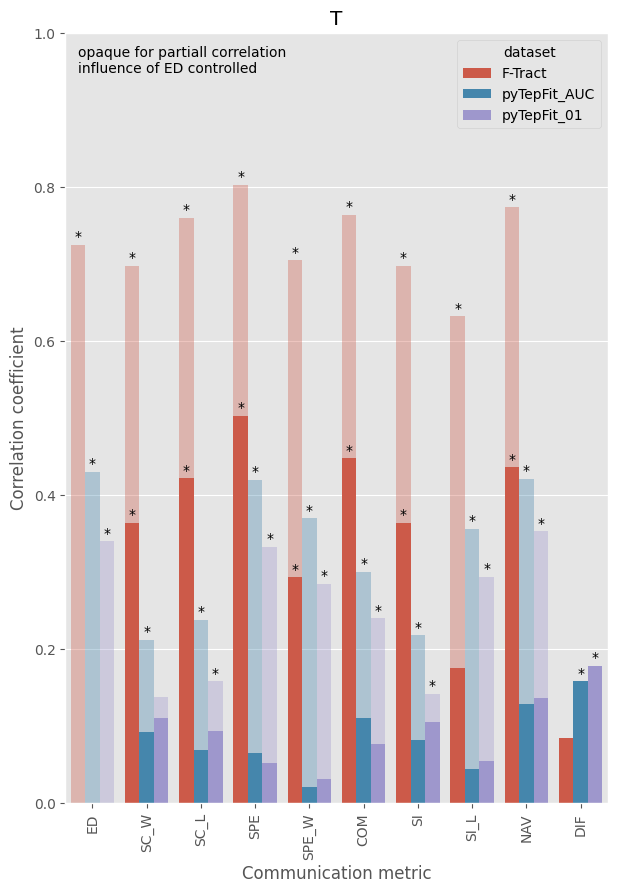

In [22]:
plotting.plot_results_overlay(df_stat_all,df_stat_all_partial,title="T",fig_dir=fig_dir)